In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import re
import os
import pickle
from wordcloud import WordCloud

In [12]:
# Importing the dataset
tweets = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='utf-8',header=None)
tweets.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [13]:
tweets.columns = ['sentiment','id','date','query_string','user','text']
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   sentiment     1600000 non-null  int64 
 1   id            1600000 non-null  int64 
 2   date          1600000 non-null  object
 3   query_string  1600000 non-null  object
 4   user          1600000 non-null  object
 5   text          1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [14]:
tweets.drop(['id','date','query_string','user'],inplace=True,axis=1)
tweets['sentiment'].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

In [15]:
# Convert the 4 into 1 (positive sentiment)
tweets['sentiment'] = tweets['sentiment'].map({0: 0, 4: 1})
tweets['sentiment'].value_counts()

0    800000
1    800000
Name: sentiment, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

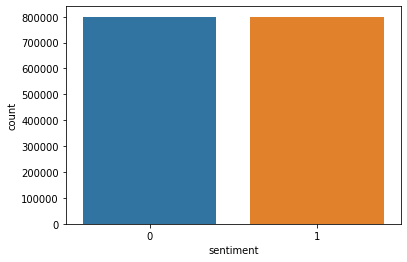

In [16]:
# Visualising the distribution and the wordcloud of sentiments
sns.countplot(data=tweets,x='sentiment')